In [1]:
import networkx as nx
import math
import numpy as np
import matplotlib as mat
import matplotlib.pyplot as plt 
import random
%matplotlib inline

In [2]:
# plot settings
almost_black = '#262626'
plt.rcParams['text.usetex'] = False
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['axes.edgecolor'] = almost_black
plt.rcParams['text.color'] = almost_black
plt.rcParams['axes.linewidth'] = 0.5
plt.rcParams['axes.labelsize'] = 12

Implement an information cascade model, in which the probability of node i activating node j is proportional to the weight of the edge from i to j.

In [3]:
def information_cascade(G,t_tot,init):
    
    t = 0
    
    max_weight = max([e[2]['weight'] for e in G.edges(data=True)])
    
    activation_times = {}
    for i in init:
        activation_times[i]=0
    
    while t<t_tot:
    
        curr_infectious = [n for n in activation_times if activation_times[n]==t]

        for n in curr_infectious:
            for m in G.neighbors(n):
                if m not in activation_times.keys():
                    p = G[n][m]['weight']
                    if p>random.uniform(0,1)*max_weight:
                        activation_times[m] = t+1
                        
        t+=1

    return activation_times
    

# Selecting the Initial activation nodes

In [33]:
import pandas as pd

In [34]:
nodes = pd.read_csv("../nodes_with_metadata.csv")

In [35]:
nodes.head()

,Id,Label,timeset,communityid,twittername,first name,last name,political affiliation,indegree,outdegree,degree,eigencentrality,community,polygon
0,1417929933800751104,NaN,NaN,1,NaN,NaN,NaN,NaN,0,1,1,0.0,Liberal,1
1,1052290795942731777,NaN,NaN,1,NaN,NaN,NaN,NaN,0,1,1,0.0,Liberal,1
2,1247907027650838528,NaN,NaN,1,NaN,NaN,NaN,NaN,0,1,1,0.0,Liberal,1
3,1103476860187369472,NaN,NaN,1,NaN,NaN,NaN,NaN,0,1,1,0.0,Liberal,1
4,998590102573023232,NaN,NaN,1,NaN,NaN,NaN,NaN,0,1,1,0.0,Liberal,1


In [36]:
retweeting_activists_mps = nodes.dropna(subset=["political affiliation"])

In [37]:
retweeting_activists_mps.head()

,Id,Label,timeset,communityid,twittername,first name,last name,political affiliation,indegree,outdegree,degree,eigencentrality,community,polygon
21,86384661,NaN,NaN,1,Yasir_Naqvi,Yasir,Naqvi,Liberal,132,0,132,0.230067,Liberal,6
25,2344419362,NaN,NaN,1,SalmaZahid15,Salma,Zahid,Liberal,75,3,78,0.169595,Liberal,6
61,170377354,NaN,NaN,1,AnthonyRota,Anthony,Rota,Liberal,5,0,5,0.012606,Liberal,6
79,2942312619,NaN,NaN,1,YRobillardPLC,Yves,Robillard,Liberal,1,0,1,0.000000,Liberal,6
120,3242606862,NaN,NaN,1,MMcLeodNWT,Michael,McLeod,Liberal,19,1,20,0.040971,Liberal,6


In [38]:
retweeting_activists_mps.describe()

,Id,Label,timeset,communityid,indegree,outdegree,degree,eigencentrality,polygon
count,2.770000e+02,0.0,0.0,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000
mean,1.669641e+17,NaN,NaN,2.833935,50.685921,0.584838,51.270758,0.131738,5.393502
std,4.086269e+17,NaN,NaN,3.159046,57.596034,1.214729,57.906180,0.177564,1.207027
min,3.358671e+06,NaN,NaN,1.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,1.580958e+08,NaN,NaN,1.000000,11.000000,0.000000,11.000000,0.012606,6.000000
50%,4.173898e+08,NaN,NaN,2.000000,30.000000,0.000000,31.000000,0.059880,6.000000
75%,2.874773e+09,NaN,NaN,3.000000,68.000000,1.000000,69.000000,0.170186,6.000000
max,1.427259e+18,NaN,NaN,21.000000,378.000000,8.000000,381.000000,1.000000,6.000000


In [39]:
retweeting_activists_mps = retweeting_activists_mps[retweeting_activists_mps["outdegree"] > 0]

In [40]:
retweeting_activists_mps.head()

,Id,Label,timeset,communityid,twittername,first name,last name,political affiliation,indegree,outdegree,degree,eigencentrality,community,polygon
25,2344419362,NaN,NaN,1,SalmaZahid15,Salma,Zahid,Liberal,75,3,78,0.169595,Liberal,6
120,3242606862,NaN,NaN,1,MMcLeodNWT,Michael,McLeod,Liberal,19,1,20,0.040971,Liberal,6
152,360677740,NaN,NaN,1,lisahepfner2021,Lisa,Hepfner,Liberal,72,1,73,0.157580,Liberal,6
364,25813888,NaN,NaN,1,NaN,NaN,NaN,Activist Organization,47,1,48,0.034668,Liberal,3
519,2322580746,NaN,NaN,1,jimcarr_wpg,Jim,Carr,Liberal,7,1,8,0.012606,Liberal,6


In [41]:
retweeting_activists_mps.describe()

,Id,Label,timeset,communityid,indegree,outdegree,degree,eigencentrality,polygon
count,8.100000e+01,0.0,0.0,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000
mean,1.940011e+17,NaN,NaN,1.839506,72.148148,2.000000,74.148148,0.228402,5.740741
std,4.506026e+17,NaN,NaN,1.156036,67.549817,1.491643,67.799541,0.219144,0.848201
min,1.601440e+07,NaN,NaN,1.000000,0.000000,1.000000,1.000000,0.000000,3.000000
25%,2.345509e+08,NaN,NaN,1.000000,22.000000,1.000000,24.000000,0.059880,6.000000
50%,4.880522e+08,NaN,NaN,1.000000,54.000000,1.000000,55.000000,0.162127,6.000000
75%,2.891741e+09,NaN,NaN,3.000000,97.000000,3.000000,102.000000,0.330466,6.000000
max,1.427259e+18,NaN,NaN,5.000000,378.000000,8.000000,381.000000,1.000000,6.000000


In [42]:
len(retweeting_activists_mps["outdegree"])

81

## Selecting the targets from the edges

In [43]:
edges = pd.read_csv("../Null Model Comparison/largest_component_networkx_format.csv", names=["Source", "Target", "Weight"])

In [44]:
edges.head()

,Source,Target,Weight
0,1385933370090209280,158095776,"{""weight"":1}"
1,1416535505454338050,158095776,"{""weight"":8}"
2,1416535505454338050,1604931252,"{""weight"":1}"
3,544695802,158095776,"{""weight"":1}"
4,716257068538327040,158095776,"{""weight"":1}"


In [45]:
relevant_paths = pd.merge(edges, retweeting_activists_mps, left_on='Source', right_on='Id')

In [46]:
relevant_paths.head()

,Source,Target,Weight,Id,Label,timeset,communityid,twittername,first name,last name,political affiliation,indegree,outdegree,degree,eigencentrality,community,polygon
0,150270263,18681111,"{""weight"":1}",150270263,NaN,NaN,1,NaN,NaN,NaN,Activist Organization,30,1,31,0.037561,Liberal,3
1,29545977,59686058,"{""weight"":1}",29545977,NaN,NaN,2,NaN,NaN,NaN,Activist Organization,7,1,8,0.006303,NDP,3
2,25813888,150270263,"{""weight"":1}",25813888,NaN,NaN,1,NaN,NaN,NaN,Activist Organization,47,1,48,0.034668,Liberal,3
3,577727470,119925381,"{""weight"":1}",577727470,NaN,NaN,2,NaN,NaN,NaN,Activist Organization,45,1,46,0.031516,NDP,3
4,294660973,294660973,"{""weight"":1}",294660973,NaN,NaN,5,NaN,NaN,NaN,Activist Organization,63,1,64,0.014769,LGBTQ2S+,3


In [47]:
activation_nodes = relevant_paths['Target'].unique()

In [48]:
activation_nodes

array([           18681111,            59686058,           150270263,
                 119925381,           294660973,            14079041,
                  17969963,          2715275551,           377588094,
       1342125115383939073,           273262205,            24990450,
                3025416359, 1425866189780160514,          2530008414,
                2800741820,            16014404, 1063494232126689280,
                 408072407,           234550882,          3402128080,
                 803381983,           261772246,           417389780,
       1170770038208565248,          1707636642, 1143229947932229632,
                2254171724,          2555308646,           739149720,
        989311745100566529,           268832287,  883774859452579840,
                  15810950,           129395750,  791282631006621696,
                 256552850, 1086084557009575936,            36133644,
                  34606493,           564207331,           414218319,
        943174774154

In [49]:
len(activation_nodes)

91

In [50]:
df = pd.DataFrame(data=activation_nodes, columns=["id"])


In [51]:
activation_nodes_profile_df = pd.merge(df, nodes, how="inner", left_on="id", right_on="Id")
activation_nodes_profile_df

,id,Id,Label,timeset,communityid,twittername,first name,last name,political affiliation,indegree,outdegree,degree,eigencentrality,community,polygon
0,18681111,18681111,NaN,NaN,2,NaN,NaN,NaN,Activist Organization,46,0,46,0.025898,NDP,3
1,59686058,59686058,NaN,NaN,2,NaN,NaN,NaN,Activist Organization,11,0,11,0.021728,NDP,3
2,150270263,150270263,NaN,NaN,1,NaN,NaN,NaN,Activist Organization,30,1,31,0.037561,Liberal,3
3,119925381,119925381,NaN,NaN,5,NaN,NaN,NaN,Activist Organization,108,0,108,0.080274,LGBTQ2S+,3
4,294660973,294660973,NaN,NaN,5,NaN,NaN,NaN,Activist Organization,63,1,64,0.014769,LGBTQ2S+,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,165812196,165812196,NaN,NaN,1,stevenmackinnon,Steven,MacKinnon,Liberal,5,0,5,0.010864,Liberal,6
87,175259033,175259033,NaN,NaN,2,taylorbachrach,Taylor,Bachrach,NDP,60,0,60,0.463605,NDP,6
88,215632349,215632349,NaN,NaN,2,CharlieAngusNDP,Charlie,Angus,NDP,378,3,381,0.657356,NDP,6
89,341866567,341866567,NaN,NaN,2,LoriIdlout,Lori,Idlout,NDP,67,2,69,0.456031,NDP,6


In [53]:
activation_nodes_profile_df.to_csv("activation_nodes.csv")

Run a Groupby so we can Randomly pick a subset of nodes to run our diffusion on from one community 

In [55]:
activation_community_groups = activation_nodes_profile_df.groupby("community")

In [59]:
activation_community_groups.groups

{'Bloc Québécois': [9, 10, 11, 12, 13, 14, 15, 16, 17, 20, 21, 22, 26], 'Conservative': [6, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43], 'LGBTQ2S+': [3, 4], 'Liberal': [2, 18, 19, 23, 24, 25, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86], 'NDP': [0, 1, 5, 7, 8, 87, 88, 89, 90]}

# Preparing Edges

The edges in this network are going to be flipped so we can let information be travel down to those the person was retweeted by

In [21]:
edges.head()

,Source,Target,Weight
0,1385933370090209280,158095776,"{""weight"":1}"
1,1416535505454338050,158095776,"{""weight"":8}"
2,1416535505454338050,1604931252,"{""weight"":1}"
3,544695802,158095776,"{""weight"":1}"
4,716257068538327040,158095776,"{""weight"":1}"


In [22]:
edges = edges[['Target', 'Source', 'Weight']]

In [23]:
edges 


,Target,Source,Weight
0,158095776,1385933370090209280,"{""weight"":1}"
1,158095776,1416535505454338050,"{""weight"":8}"
2,1604931252,1416535505454338050,"{""weight"":1}"
3,158095776,544695802,"{""weight"":1}"
4,158095776,716257068538327040,"{""weight"":1}"
...,...,...,...
13996,196717787,77596220,"{""weight"":1}"
13997,196717787,891058415195303939,"{""weight"":1}"
13998,196717787,1095768409449459712,"{""weight"":1}"
13999,196717787,881426857,"{""weight"":1}"


In [24]:
edges = edges.set_index("Target")

In [25]:
edges.to_csv("Source_retweeted_by_target.csv")

# Running an information cascade 

In [60]:
G = nx.read_edgelist('Source_retweeted_by_target.csv', comments='#',
                     create_using=nx.DiGraph(), 
                     delimiter=','"", 
                     nodetype=int, 
                     encoding='utf-8')

Running an initial cascade, starting with the nodes where the path lengths are going to be more than 1 
- G: the Graph with the edges reversed to allow for information to flow down to the retweeters
- Time: let this initally be 4 to see what we get with little spread
- activation nodes: These are the nodes where another MP or activist organization has retweeted them

### Liberal Experiment

In [299]:
len(activation_community_groups.get_group("Liberal")['id'].tolist())

49

In [300]:
liberal_starters = activation_community_groups.get_group("Liberal")['id'].tolist()

^ These are the starting nodes ^

In [301]:
t5 = information_cascade(G,5,liberal_starters)

In [302]:
experiments = []
for i in range(1,1000):
    t5 = information_cascade(G,5,liberal_starters)
    experiment = pd.DataFrame.from_dict(t5, orient='index',
                       columns=[ "activation_time_exp_{}".format(i)])
    experiments.append(experiment)

In [303]:
experiments_df = experiments[0]

for i in range (1, 999):
    experiments_df = pd.merge(experiments[i], experiments_df, left_index=True, right_index=True, how='outer')

In [304]:
experiments_df['average_activation_time'] = experiments_df.max(axis=1)
experiments_df['average_activation_time'] = experiments_df['average_activation_time'].apply(np.ceil)

In [305]:
experiments_df.describe()

,activation_time_exp_999,activation_time_exp_998,activation_time_exp_997,activation_time_exp_996,activation_time_exp_995,activation_time_exp_994,activation_time_exp_993,activation_time_exp_992,activation_time_exp_991,activation_time_exp_990,...,activation_time_exp_9,activation_time_exp_8,activation_time_exp_7,activation_time_exp_6,activation_time_exp_5,activation_time_exp_4,activation_time_exp_3,activation_time_exp_2,activation_time_exp_1,average_activation_time
count,139.000000,137.000000,135.000000,129.000000,132.000000,128.000000,121.000000,130.000000,128.000000,122.000000,...,124.000000,110.000000,130.000000,116.000000,120.000000,135.000000,129.000000,134.000000,126.000000,2702.000000
mean,0.647482,0.642336,0.637037,0.620155,0.636364,0.632812,0.595041,0.623077,0.617188,0.598361,...,0.604839,0.563636,0.623077,0.577586,0.591667,0.637037,0.620155,0.634328,0.611111,1.072909
std,0.479482,0.481072,0.482645,0.487240,0.498436,0.515448,0.492925,0.486490,0.487983,0.492251,...,0.490869,0.516290,0.486490,0.496087,0.493586,0.482645,0.487240,0.483425,0.489444,0.322337
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


This shows that the maxiumum steps needed after a 1000 tries of diffusing the information was 3

In [306]:
experiments_df['average_activation_time']

1263631                1.0
5548282                1.0
7801522                1.0
9898272                1.0
9946272                2.0
                      ... 
1445901048951017472    1.0
1445905244500676608    1.0
1446352422272528385    2.0
1447502440820002819    1.0
1449405859772047365    1.0
Name: average_activation_time, Length: 2702, dtype: float64

Perform An Inner Join on the nodes and the experiments to get community information

In [307]:
community_info = pd.merge(experiments_df['average_activation_time'], nodes, left_index=True, right_on="Id")

In [308]:
def bins_labels(bins, **kwargs):
    bin_w = (max(bins) - min(bins)) / (len(bins) - 1)
    plt.xticks(np.arange(min(bins)+bin_w/2, max(bins), bin_w), bins , **kwargs)
    plt.xlim(bins[0], bins[-1])

ValueError: The number of FixedLocator locations (9), usually from a call to set_ticks, does not match the number of ticklabels (10).

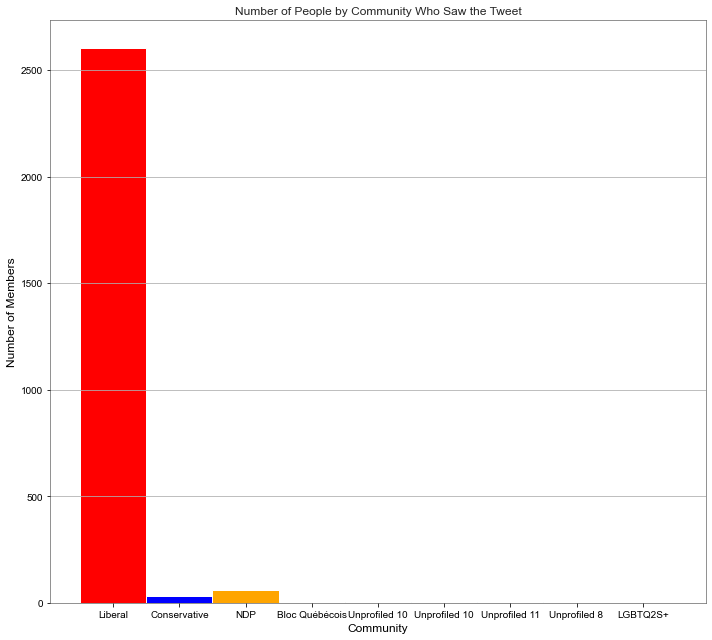

In [309]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(10, 9))
data = community_info["community"].to_numpy()

N, bins, patches = ax.hist(data, edgecolor='white', bins=9, linewidth=1)


patches[0].set_facecolor('red')
patches[1].set_facecolor('blue')
patches[2].set_facecolor('orange')
patches[3].set_facecolor('black')

plt.xlabel("Community")
plt.ylabel("Number of Members")
plt.grid(axis='y')
plt.title(label="Number of People by Community Who Saw the Tweet")
bins_labels(bins, fontsize=20)

plt.show()

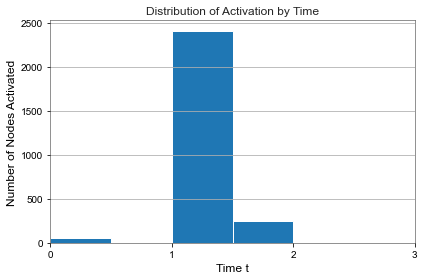

In [310]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(6, 4
                               ))
data = community_info["average_activation_time"].to_numpy()

N, bins, patches = ax.hist(data, edgecolor='white', bins=4, linewidth=1 , density=False)
plt.xlabel("Time t")
plt.ylabel("Number of Nodes Activated")
plt.grid(axis='y')
plt.title(label="Distribution of Activation by Time")
ax.set(xticks=range(4), xlim=[0, 3])

plt.show()

https://stackoverflow.com/questions/23246125/how-to-center-labels-in-histogram-plot/23246992

https://www.tutorialspoint.com/how-to-plot-a-line-graph-from-histogram-data-in-matplotlib

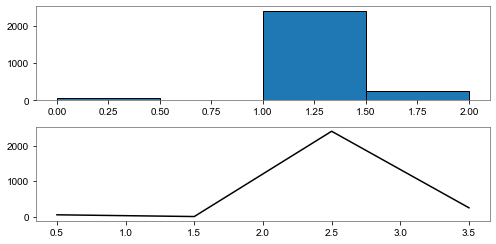

In [311]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.subplot(211)
data = experiments_df['average_activation_time'].tolist()
y, binEdges = np.histogram(data, bins=4)
plt.hist(data, bins=4, edgecolor='black')
plt.subplot(212)
bincenters = (binEdges[1:] + binEdges[:-1])
plt.plot(bincenters, y, '-', c='black')
plt.show()

In [312]:
experiments_df['average_activation_time'].to_csv("liberal_Information_Cascade_EXP2.csv")

### Looking for Notable Nodes 

Notable Nodes Are:

In [313]:
diversly_retweeted = [215632349, 196717787]

In [314]:
diversly_retweeting = [596787864, 12034642, 711980580813066240]

In [315]:
high_undirected_betweenness_retweeters = [16272844]

### Conservative Experiment

In [316]:
len(activation_community_groups.get_group("Conservative")['id'].tolist())

18

In [322]:
conservative_starters = activation_community_groups.get_group("Conservative")['id'].tolist()

In [323]:
conservative_starters

[17969963,
 2254171724,
 2555308646,
 739149720,
 989311745100566529,
 268832287,
 883774859452579840,
 15810950,
 129395750,
 791282631006621696,
 256552850,
 1086084557009575936,
 36133644,
 34606493,
 564207331,
 414218319,
 943174774154498048,
 412708728]

^ These are the starting nodes ^

In [324]:
t5_conservative = information_cascade(G,5,conservative_starters)

In [325]:
experiments_conservative = []
for i in range(1,1000):
    t5 = information_cascade(G,5,conservative_starters)
    experiment = pd.DataFrame.from_dict(t5, orient='index',
                       columns=[ "activation_time_exp_{}".format(i)])
    experiments_conservative.append(experiment)

In [326]:
experiments_conservative_df = experiments_conservative[0]

for i in range (1, 999):
    experiments_conservative_df = pd.merge(experiments_conservative[i], experiments_conservative_df, left_index=True, right_index=True, how='outer')

In [327]:
experiments_conservative_df['average_activation_time'] = experiments_conservative_df.mean(axis=1)
experiments_conservative_df['average_activation_time'] = experiments_conservative_df['average_activation_time'].apply(np.ceil)

In [380]:
experiments_conservative_df.describe()

,activation_time_exp_999,activation_time_exp_998,activation_time_exp_997,activation_time_exp_996,activation_time_exp_995,activation_time_exp_994,activation_time_exp_993,activation_time_exp_992,activation_time_exp_991,activation_time_exp_990,...,activation_time_exp_9,activation_time_exp_8,activation_time_exp_7,activation_time_exp_6,activation_time_exp_5,activation_time_exp_4,activation_time_exp_3,activation_time_exp_2,activation_time_exp_1,average_activation_time
count,37.000000,43.000000,32.000000,39.000000,46.000000,45.000000,40.000000,39.000000,37.000000,34.000000,...,34.000000,46.000000,46.000000,39.000000,38.000000,53.000000,40.000000,35.000000,34.000000,951.000000
mean,0.513514,0.627907,0.437500,0.538462,0.608696,0.600000,0.550000,0.538462,0.513514,0.470588,...,0.470588,0.608696,0.608696,0.538462,0.526316,0.660377,0.575000,0.485714,0.470588,1.124080
std,0.506712,0.578309,0.504016,0.505035,0.493435,0.495434,0.503831,0.505035,0.506712,0.506640,...,0.506640,0.493435,0.493435,0.505035,0.506009,0.478113,0.549475,0.507093,0.506640,0.383006
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000


This shows that the maxiumum steps needed after a 1000 tries of diffusing the information was 2

In [329]:
experiments_conservative_df['average_activation_time']

14248154               1.0
14398840               1.0
14678279               1.0
14781177               1.0
15333188               2.0
                      ... 
1441020558691475456    1.0
1442850635200843792    1.0
1443218100824985600    1.0
1445882748585930752    1.0
1446352422272528385    2.0
Name: average_activation_time, Length: 951, dtype: float64

Perform An Inner Join on the nodes and the experiments to get community information

In [330]:
community_info_conservative = pd.merge(experiments_conservative_df['average_activation_time'], nodes, left_index=True, right_on="Id")

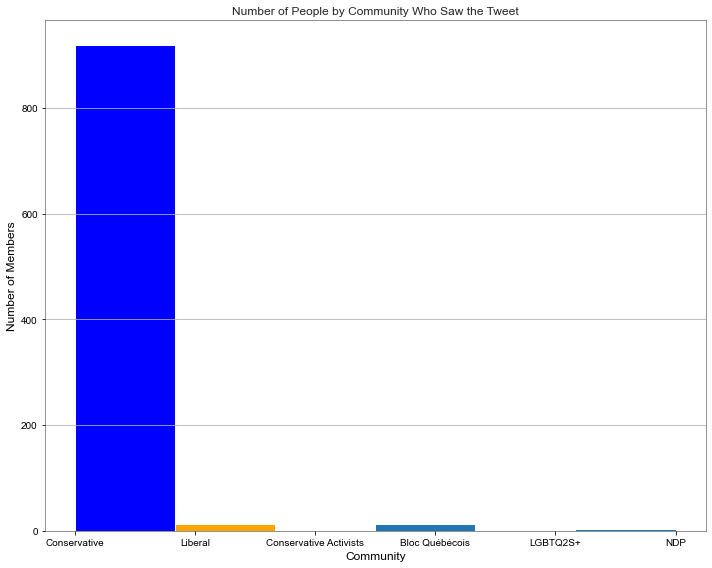

In [334]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(10, 8))
data = community_info_conservative["community"].to_numpy()

N, bins, patches = ax.hist(data, edgecolor='white', bins=6, linewidth=1)


patches[0].set_facecolor('blue')
patches[1].set_facecolor('orange')
patches[2].set_facecolor('red')


plt.xlabel("Community")
plt.ylabel("Number of Members")
plt.grid(axis='y')
plt.title(label="Number of People by Community Who Saw the Tweet")
#bins_labels(bins, fontsize=20)

plt.show()

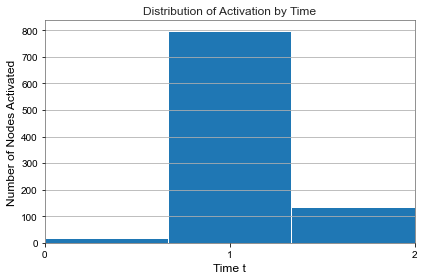

In [332]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(6, 4
                               ))
data = experiments_conservative_df["average_activation_time"].to_numpy()

N, bins, patches = ax.hist(data, edgecolor='white', bins=3, linewidth=1 , density=False)
plt.xlabel("Time t")
plt.ylabel("Number of Nodes Activated")
plt.grid(axis='y')
plt.title(label="Distribution of Activation by Time")
ax.set(xticks=range(3), xlim=[0, 2])

plt.show()

https://stackoverflow.com/questions/23246125/how-to-center-labels-in-histogram-plot/23246992

https://www.tutorialspoint.com/how-to-plot-a-line-graph-from-histogram-data-in-matplotlib

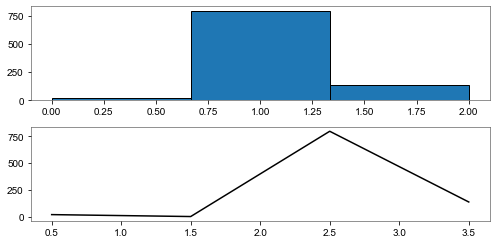

In [333]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.subplot(211)
data = experiments_conservative_df['average_activation_time'].tolist()
y, binEdges = np.histogram(data, bins=4)
plt.hist(data, bins=3, edgecolor='black')
plt.subplot(212)
bincenters = (binEdges[1:] + binEdges[:-1])
plt.plot(bincenters, y, '-', c='black')
plt.show()

In [335]:
experiments_conservative_df['average_activation_time'].to_csv("Conservative_Information_Cascade_EXP2.csv")

### NDP Experiment

In [336]:
len(activation_community_groups.get_group("NDP")['id'].tolist())

9

In [337]:
ndp_starters = activation_community_groups.get_group("NDP")['id'].tolist()

In [338]:
ndp_starters

[18681111,
 59686058,
 14079041,
 2715275551,
 377588094,
 175259033,
 215632349,
 341866567,
 196717787]

^ These are the starting nodes ^

In [339]:
t5_ndp = information_cascade(G,5,ndp_starters)

In [340]:
experiments_ndp = []
for i in range(1,1000):
    t5 = information_cascade(G,5,ndp_starters)
    experiment = pd.DataFrame.from_dict(t5, orient='index',
                       columns=[ "activation_time_exp_{}".format(i)])
    experiments_ndp.append(experiment)

In [341]:
experiments_ndp_df = experiments_ndp[0]

for i in range (1, 999):
    experiments_ndp_df = pd.merge(experiments_ndp[i], experiments_ndp_df, left_index=True, right_index=True, how='outer')

In [342]:
experiments_ndp_df['average_activation_time'] = experiments_ndp_df.mean(axis=1)
experiments_ndp_df['average_activation_time'] = experiments_ndp_df['average_activation_time'].apply(np.ceil)

In [343]:
experiments_ndp_df.describe()

,activation_time_exp_999,activation_time_exp_998,activation_time_exp_997,activation_time_exp_996,activation_time_exp_995,activation_time_exp_994,activation_time_exp_993,activation_time_exp_992,activation_time_exp_991,activation_time_exp_990,...,activation_time_exp_9,activation_time_exp_8,activation_time_exp_7,activation_time_exp_6,activation_time_exp_5,activation_time_exp_4,activation_time_exp_3,activation_time_exp_2,activation_time_exp_1,average_activation_time
count,35.000000,29.000000,35.000000,36.000000,37.000000,36.000000,31.000000,36.000000,39.000000,25.000000,...,27.000000,28.000000,34.000000,39.000000,31.000000,26.000000,25.000000,36.000000,33.000000,1123.000000
mean,0.742857,0.689655,0.771429,0.750000,0.756757,0.805556,0.709677,0.777778,0.769231,0.640000,...,0.666667,0.678571,0.735294,0.769231,0.709677,0.653846,0.640000,0.750000,0.727273,1.077471
std,0.443440,0.470824,0.490241,0.439155,0.434959,0.524783,0.461414,0.484686,0.426833,0.489898,...,0.480384,0.475595,0.447811,0.426833,0.461414,0.485165,0.489898,0.439155,0.452267,0.298929
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.000000,0.500000,0.750000,1.000000,0.750000,0.000000,0.750000,1.000000,0.000000,...,0.000000,0.000000,0.250000,1.000000,0.000000,0.000000,0.000000,0.750000,0.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


This shows that the maxiumum steps needed after a 1000 tries of diffusing the information was 2

In [344]:
experiments_ndp_df['average_activation_time']

42203                  1.0
1176801                1.0
3258511                1.0
7312992                1.0
7562042                1.0
                      ... 
1441302197409435648    2.0
1442989306256113667    1.0
1443532517164785664    1.0
1444458812614709250    1.0
1446352422272528385    1.0
Name: average_activation_time, Length: 1123, dtype: float64

Perform An Inner Join on the nodes and the experiments to get community information

In [345]:
community_info_ndp = pd.merge(experiments_ndp_df['average_activation_time'], nodes, left_index=True, right_on="Id")

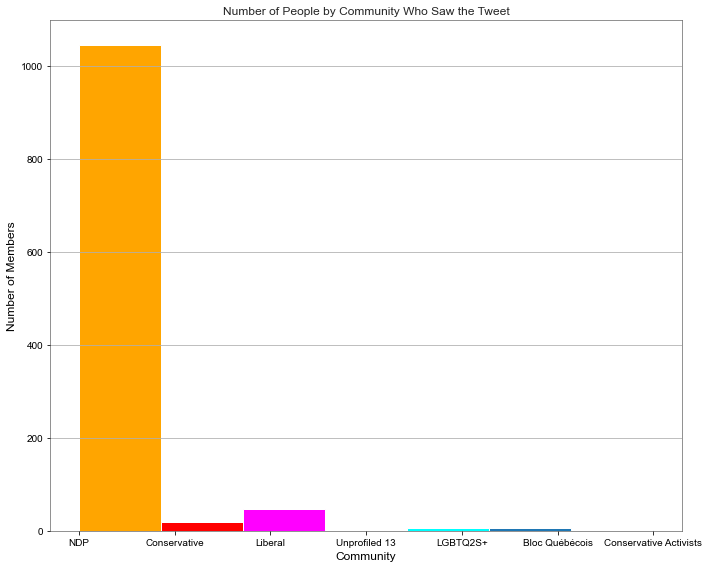

In [349]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(10, 8))
data = community_info_ndp["community"].to_numpy()

N, bins, patches = ax.hist(data, edgecolor='white', bins=7, linewidth=1)


patches[0].set_facecolor('orange')
patches[1].set_facecolor('red')
patches[2].set_facecolor('magenta')
patches[3].set_facecolor('blue')
patches[4].set_facecolor('cyan')

plt.xlabel("Community")
plt.ylabel("Number of Members")
plt.grid(axis='y')
plt.title(label="Number of People by Community Who Saw the Tweet")
#bins_labels(bins, fontsize=20)

plt.show()

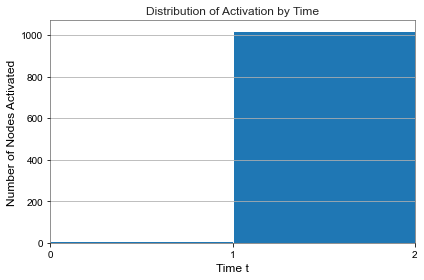

In [347]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(6, 4
                               ))
data = experiments_ndp_df["average_activation_time"].to_numpy()

N, bins, patches = ax.hist(data, edgecolor='white', bins=3, linewidth=1 , density=False)
plt.xlabel("Time t")
plt.ylabel("Number of Nodes Activated")
plt.grid(axis='y')
plt.title(label="Distribution of Activation by Time")
ax.set(xticks=range(3), xlim=[0, 2])

plt.show()

https://stackoverflow.com/questions/23246125/how-to-center-labels-in-histogram-plot/23246992

https://www.tutorialspoint.com/how-to-plot-a-line-graph-from-histogram-data-in-matplotlib

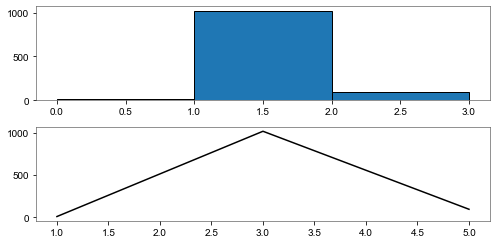

In [348]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.subplot(211)
data = experiments_ndp_df['average_activation_time'].tolist()
y, binEdges = np.histogram(data, bins=3)
plt.hist(data, bins=3, edgecolor='black')
plt.subplot(212)
bincenters = (binEdges[1:] + binEdges[:-1])
plt.plot(bincenters, y, '-', c='black')
plt.show()

In [350]:
experiments_ndp_df['average_activation_time'].to_csv("NDP_Information_Cascade_EXP2.csv")

### LGBTQS+ Experiment

In [351]:
len(activation_community_groups.get_group("LGBTQ2S+")['id'].tolist())

2

In [352]:
LGBTQ2S_starters = activation_community_groups.get_group("LGBTQ2S+")['id'].tolist()

In [353]:
LGBTQ2S_starters

[119925381, 294660973]

^ These are the starting nodes ^

In [354]:
t5_LGBTQ2S = information_cascade(G,5,LGBTQ2S_starters)

In [355]:
experiments_LGBTQ2S = []
for i in range(1,1000):
    t5 = information_cascade(G,5,LGBTQ2S_starters)
    experiment = pd.DataFrame.from_dict(t5, orient='index',
                       columns=[ "activation_time_exp_{}".format(i)])
    experiments_LGBTQ2S.append(experiment)

In [356]:
experiments_LGBTQ2S_df = experiments_LGBTQ2S[0]

for i in range (1, 999):
    experiments_LGBTQ2S_df = pd.merge(experiments_LGBTQ2S[i], experiments_LGBTQ2S_df, left_index=True, right_index=True, how='outer')

In [357]:
experiments_LGBTQ2S_df['average_activation_time'] = experiments_LGBTQ2S_df.mean(axis=1)
experiments_LGBTQ2S_df['average_activation_time'] = experiments_LGBTQ2S_df['average_activation_time'].apply(np.ceil)

In [358]:
experiments_LGBTQ2S_df.describe()

,activation_time_exp_999,activation_time_exp_998,activation_time_exp_997,activation_time_exp_996,activation_time_exp_995,activation_time_exp_994,activation_time_exp_993,activation_time_exp_992,activation_time_exp_991,activation_time_exp_990,...,activation_time_exp_9,activation_time_exp_8,activation_time_exp_7,activation_time_exp_6,activation_time_exp_5,activation_time_exp_4,activation_time_exp_3,activation_time_exp_2,activation_time_exp_1,average_activation_time
count,2.0,4.00000,4.00000,4.00000,3.000000,5.000000,5.000000,6.000000,4.00000,2.0,...,4.00000,5.000000,2.0,6.000000,6.000000,8.00000,7.000000,2.0,8.00000,184.000000
mean,0.0,0.50000,0.50000,0.50000,0.333333,0.600000,0.600000,0.666667,0.50000,0.0,...,0.50000,0.600000,0.0,0.666667,0.666667,0.75000,0.714286,0.0,0.75000,1.059783
std,0.0,0.57735,0.57735,0.57735,0.577350,0.547723,0.547723,0.516398,0.57735,0.0,...,0.57735,0.547723,0.0,0.516398,0.516398,0.46291,0.487950,0.0,0.46291,0.279953
min,0.0,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,...,0.00000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0.00000,0.000000
25%,0.0,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.250000,0.00000,0.0,...,0.00000,0.000000,0.0,0.250000,0.250000,0.75000,0.500000,0.0,0.75000,1.000000
50%,0.0,0.50000,0.50000,0.50000,0.000000,1.000000,1.000000,1.000000,0.50000,0.0,...,0.50000,1.000000,0.0,1.000000,1.000000,1.00000,1.000000,0.0,1.00000,1.000000
75%,0.0,1.00000,1.00000,1.00000,0.500000,1.000000,1.000000,1.000000,1.00000,0.0,...,1.00000,1.000000,0.0,1.000000,1.000000,1.00000,1.000000,0.0,1.00000,1.000000
max,0.0,1.00000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.00000,0.0,...,1.00000,1.000000,0.0,1.000000,1.000000,1.00000,1.000000,0.0,1.00000,2.000000


This shows that the maxiumum steps needed after a 1000 tries of diffusing the information was 2

In [359]:
experiments_LGBTQ2S_df['average_activation_time']

7491592                1.0
14221144               1.0
16267310               1.0
16422863               2.0
16811701               1.0
                      ... 
1380189591735517190    1.0
1390067256080621568    1.0
1393384383650975744    1.0
1396338835596795904    1.0
1437800221375963143    1.0
Name: average_activation_time, Length: 184, dtype: float64

Perform An Inner Join on the nodes and the experiments to get community information

In [360]:
community_info_LGBTQ2S = pd.merge(experiments_LGBTQ2S_df['average_activation_time'], nodes, left_index=True, right_on="Id")

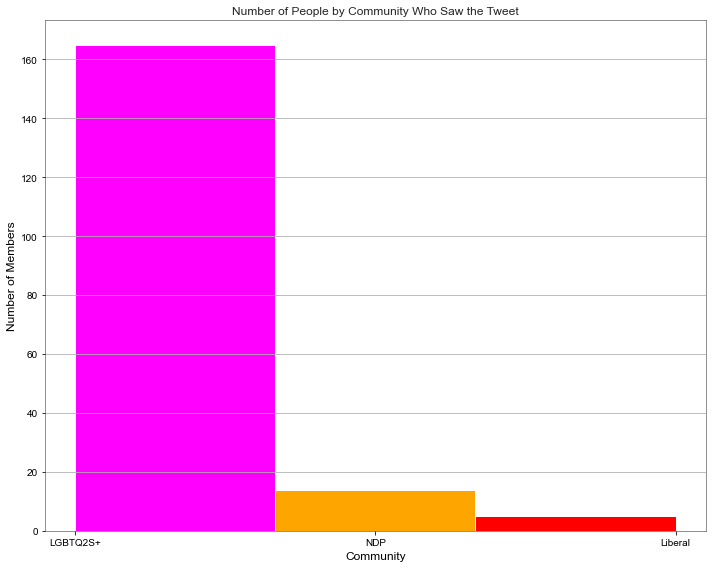

In [361]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(10, 8))
data = community_info_LGBTQ2S["community"].to_numpy()

N, bins, patches = ax.hist(data, edgecolor='white', bins=3, linewidth=1)


patches[0].set_facecolor('magenta')
patches[1].set_facecolor('orange')
patches[2].set_facecolor('red')


plt.xlabel("Community")
plt.ylabel("Number of Members")
plt.grid(axis='y')
plt.title(label="Number of People by Community Who Saw the Tweet")
#bins_labels(bins, fontsize=20)

plt.show()

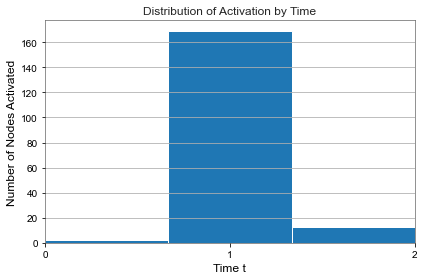

In [362]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(6, 4
                               ))
data = experiments_LGBTQ2S_df["average_activation_time"].to_numpy()

N, bins, patches = ax.hist(data, edgecolor='white', bins=3, linewidth=1 , density=False)
plt.xlabel("Time t")
plt.ylabel("Number of Nodes Activated")
plt.grid(axis='y')
plt.title(label="Distribution of Activation by Time")
ax.set(xticks=range(3), xlim=[0, 2])

plt.show()

https://stackoverflow.com/questions/23246125/how-to-center-labels-in-histogram-plot/23246992

https://www.tutorialspoint.com/how-to-plot-a-line-graph-from-histogram-data-in-matplotlib

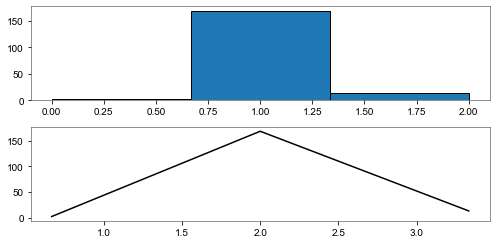

In [363]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.subplot(211)
data = experiments_LGBTQ2S_df['average_activation_time'].tolist()
y, binEdges = np.histogram(data, bins=3)
plt.hist(data, bins=3, edgecolor='black')
plt.subplot(212)
bincenters = (binEdges[1:] + binEdges[:-1])
plt.plot(bincenters, y, '-', c='black')
plt.show()

In [364]:
experiments_LGBTQ2S_df['average_activation_time'].to_csv("LGBTQ2S_Information_Cascade_EXP2.csv")

### Bloc Québécois Experiment

In [365]:
len(activation_community_groups.get_group("Bloc Québécois")['id'].tolist())

13

In [366]:
Bloc_starters =activation_community_groups.get_group("Bloc Québécois")['id'].tolist()

In [367]:
Bloc_starters

[1342125115383939073,
 273262205,
 24990450,
 3025416359,
 1425866189780160514,
 2530008414,
 2800741820,
 16014404,
 1063494232126689280,
 3402128080,
 803381983,
 261772246,
 1143229947932229632]

^ These are the starting nodes ^

In [368]:
t5_Bloc = information_cascade(G,5,Bloc_starters)

In [369]:
experiments_Bloc = []
for i in range(1,1000):
    t5 = information_cascade(G,5,Bloc_starters)
    experiment = pd.DataFrame.from_dict(t5, orient='index',
                       columns=[ "activation_time_exp_{}".format(i)])
    experiments_Bloc.append(experiment)

In [370]:
experiments_Bloc_df = experiments_Bloc[0]

for i in range (1, 999):
    experiments_Bloc_df = pd.merge(experiments_Bloc[i], experiments_Bloc_df, left_index=True, right_index=True, how='outer')

In [371]:
experiments_Bloc_df['average_activation_time'] = experiments_Bloc_df.mean(axis=1)
experiments_Bloc_df['average_activation_time'] = experiments_Bloc_df['average_activation_time'].apply(np.ceil)

In [372]:
experiments_Bloc_df.describe()

,activation_time_exp_999,activation_time_exp_998,activation_time_exp_997,activation_time_exp_996,activation_time_exp_995,activation_time_exp_994,activation_time_exp_993,activation_time_exp_992,activation_time_exp_991,activation_time_exp_990,...,activation_time_exp_9,activation_time_exp_8,activation_time_exp_7,activation_time_exp_6,activation_time_exp_5,activation_time_exp_4,activation_time_exp_3,activation_time_exp_2,activation_time_exp_1,average_activation_time
count,38.000000,34.000000,32.000000,31.000000,36.000000,33.000000,33.000000,37.000000,36.000000,29.000000,...,38.000000,38.000000,33.000000,41.000000,35.000000,39.000000,31.000000,25.000000,30.000000,467.000000
mean,0.657895,0.617647,0.593750,0.580645,0.638889,0.606061,0.606061,0.648649,0.638889,0.551724,...,0.657895,0.657895,0.606061,0.731707,0.628571,0.666667,0.580645,0.480000,0.566667,1.100642
std,0.480783,0.493270,0.498991,0.501610,0.487136,0.496198,0.496198,0.483978,0.487136,0.506120,...,0.480783,0.480783,0.496198,0.548835,0.490241,0.477567,0.501610,0.509902,0.504007,0.382755
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


This shows that the maxiumum steps needed after a 1000 tries of diffusing the information was 3

In [373]:
experiments_Bloc_df['average_activation_time']

5438072                1.0
5662022                1.0
11408322               2.0
12034642               1.0
12220452               1.0
                      ... 
1439047013690232832    1.0
1439240496921161733    1.0
1440532151582134272    1.0
1440664285210767367    1.0
1443664767013502976    1.0
Name: average_activation_time, Length: 467, dtype: float64

Perform An Inner Join on the nodes and the experiments to get community information

In [374]:
community_info_Bloc = pd.merge(experiments_Bloc_df['average_activation_time'], nodes, left_index=True, right_on="Id")

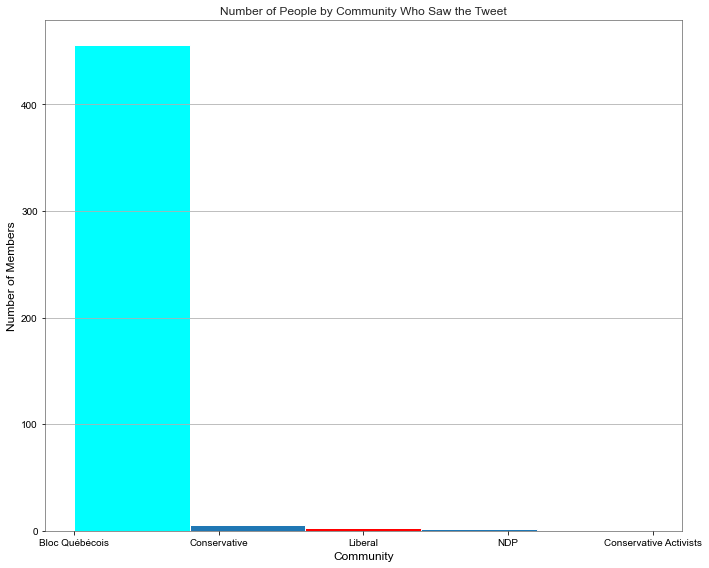

In [375]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(10, 8))
data = community_info_Bloc["community"].to_numpy()

N, bins, patches = ax.hist(data, edgecolor='white', bins=5, linewidth=1)


patches[0].set_facecolor('cyan')
patches[2].set_facecolor('red')
patches[4].set_facecolor('blue')


plt.xlabel("Community")
plt.ylabel("Number of Members")
plt.grid(axis='y')
plt.title(label="Number of People by Community Who Saw the Tweet")
#bins_labels(bins, fontsize=20)

plt.show()

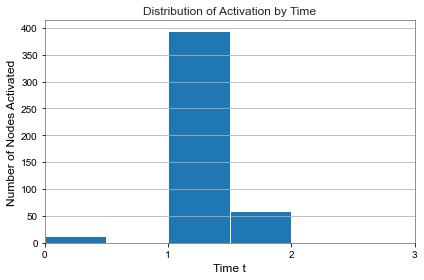

In [376]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(6, 4
                               ))
data = experiments_Bloc_df["average_activation_time"].to_numpy()

N, bins, patches = ax.hist(data, edgecolor='white', bins=4, linewidth=1 , density=False)
plt.xlabel("Time t")
plt.ylabel("Number of Nodes Activated")
plt.grid(axis='y')
plt.title(label="Distribution of Activation by Time")
ax.set(xticks=range(4), xlim=[0, 3])

plt.show()

https://stackoverflow.com/questions/23246125/how-to-center-labels-in-histogram-plot/23246992

https://www.tutorialspoint.com/how-to-plot-a-line-graph-from-histogram-data-in-matplotlib

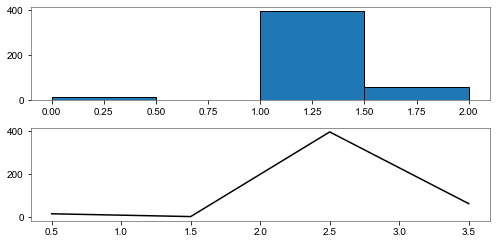

In [377]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.subplot(211)
data = experiments_Bloc_df['average_activation_time'].tolist()
y, binEdges = np.histogram(data, bins=4)
plt.hist(data, bins=4, edgecolor='black')
plt.subplot(212)
bincenters = (binEdges[1:] + binEdges[:-1])
plt.plot(bincenters, y, '-', c='black')
plt.show()

In [378]:
experiments_Bloc_df['average_activation_time'].to_csv("Bloc_Information_Cascade_EXP2.csv")

In [261]:
def run_cascade_metrics(name, starting_nodes):
    experiments = []
    for i in range(1,1000):
        t5 = information_cascade(G,5,starting_nodes)
        experiment = pd.DataFrame.from_dict(t5, orient='index',
                           columns=[ "activation_time_exp_{}".format(i)])
        experiments.append(experiment)
    
    experiments_df = experiments[0]

    for i in range (1, 999):
        experiments_df = pd.merge(experiments[i], experiments_Bloc_df, left_index=True, right_index=True, how='outer')
    
    experiments_df['{}_average_activation_time'.format(name)] = experiments_df.mean(axis=1)
    experiments_df['{}_average_activation_time'.format(name)] = experiments_df['{}_average_activation_time'.format(name)].apply(np.floor)
    return experiments_df[['{}_average_activation_time'.format(name)]]

In [263]:
run_cascade_metrics("test",Bloc_starters )

,test_average_activation_time
12220452,1.0
16014404,0.0
16213179,2.0
16450356,1.0
17721863,1.0
...,...
1435677654699675654,3.0
1437734637531504644,1.0
1439240496921161733,1.0
1440532151582134272,1.0


## Function for null model Runs

In [266]:
from functools import reduce


lib_cascade = run_cascade_metrics('liberal', [22849568, 2891740872])
con_cascade = run_cascade_metrics('conservative', [1086084557009575936, 989311745100566529])
ndp_cascade = run_cascade_metrics('ndp', [2715275551, 196717787])
lgbt_cascade = run_cascade_metrics('lgbt', [294660973, 119925381])
bloq_cascade = run_cascade_metrics('bloq', [1063494232126689280, 16014404])

data_frames = [lib_cascade, con_cascade, ndp_cascade, lgbt_cascade, bloq_cascade]

df_merged = reduce(lambda  left,right: pd.merge(left,right,left_index=True, right_index=True,
                                            how='outer'), data_frames)

df_merged

,liberal_average_activation_time,conservative_average_activation_time,ndp_average_activation_time,lgbt_average_activation_time,bloq_average_activation_time
12220452,1.0,1.0,1.0,1.0,1.0
16014404,0.0,0.0,0.0,0.0,0.0
16213179,2.0,2.0,2.0,2.0,2.0
16450356,1.0,1.0,1.0,1.0,1.0
17721863,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...
1435677654699675654,3.0,3.0,3.0,3.0,3.0
1437734637531504644,1.0,1.0,1.0,1.0,1.0
1439240496921161733,1.0,1.0,1.0,1.0,1.0
1440532151582134272,1.0,1.0,1.0,1.0,1.0


In [267]:
df_merged.describe()

,liberal_average_activation_time,conservative_average_activation_time,ndp_average_activation_time,lgbt_average_activation_time,bloq_average_activation_time
count,242.000000,234.000000,241.000000,235.000000,230.000000
mean,1.165289,1.170940,1.165975,1.170213,1.182609
std,0.452693,0.459345,0.453509,0.458498,0.449796
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000
